In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

In [3]:
corpus = ['Se uma gaivota viesse' ,
'Trazer-me o céu de lisboa' ,
'No desenho que fizesse' ,
'Nesse céu onde o olhar' ,
'E uma asa que não voa' ,
'Esmorece e cai no mar' ,
'Que perfeito coração' ,
'No meu peito bateria' ,
'Meu amor na tua mão' ,
'Nessa mão onde cabia' ,
'Perfeito o meu coração']

In [4]:
cv = CountVectorizer().fit(corpus)
vob = cv.vocabulary_
print(len(vob))
print(vob) 

33
{'se': 27, 'uma': 30, 'gaivota': 11, 'viesse': 31, 'trazer': 28, 'me': 14, 'céu': 6, 'de': 7, 'lisboa': 12, 'no': 20, 'desenho': 8, 'que': 26, 'fizesse': 10, 'nesse': 19, 'onde': 23, 'olhar': 22, 'asa': 1, 'não': 21, 'voa': 32, 'esmorece': 9, 'cai': 4, 'mar': 13, 'perfeito': 25, 'coração': 5, 'meu': 15, 'peito': 24, 'bateria': 2, 'amor': 0, 'na': 17, 'tua': 29, 'mão': 16, 'nessa': 18, 'cabia': 3}


In [5]:
#cv.get_feature_names_out() #Orderna o vocabulário
vob = {k:v for k,v in sorted(vob.items(), key=lambda item: item[1])}
vob2 = {value:key for key,value in vob.items()}
print(vob2)

{0: 'amor', 1: 'asa', 2: 'bateria', 3: 'cabia', 4: 'cai', 5: 'coração', 6: 'céu', 7: 'de', 8: 'desenho', 9: 'esmorece', 10: 'fizesse', 11: 'gaivota', 12: 'lisboa', 13: 'mar', 14: 'me', 15: 'meu', 16: 'mão', 17: 'na', 18: 'nessa', 19: 'nesse', 20: 'no', 21: 'não', 22: 'olhar', 23: 'onde', 24: 'peito', 25: 'perfeito', 26: 'que', 27: 'se', 28: 'trazer', 29: 'tua', 30: 'uma', 31: 'viesse', 32: 'voa'}


In [6]:
X = cv.transform(corpus)
#X #Matriz 11x33 (11 texto e 33 palavras)
#print(X) #Apresenta os valroes de matriz diferentes de 0
print(X.toarray()) #NÂO FAZER EM DADOS MUITO ELEVADOS 
 

[[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0]
 [0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1]
 [0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]]


In [7]:
count = np.sum(X.toarray(), axis=0)
count
for i in range(X.toarray()[0].size):
    print(i,vob2[i], count[i])

0 amor 1
1 asa 1
2 bateria 1
3 cabia 1
4 cai 1
5 coração 2
6 céu 2
7 de 1
8 desenho 1
9 esmorece 1
10 fizesse 1
11 gaivota 1
12 lisboa 1
13 mar 1
14 me 1
15 meu 3
16 mão 2
17 na 1
18 nessa 1
19 nesse 1
20 no 3
21 não 1
22 olhar 1
23 onde 2
24 peito 1
25 perfeito 2
26 que 3
27 se 1
28 trazer 1
29 tua 1
30 uma 2
31 viesse 1
32 voa 1


## Representação tf-idf

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer, TfidfTransformer, CountVectorizer

In [9]:
for v in corpus:
    print(v)

Se uma gaivota viesse
Trazer-me o céu de lisboa
No desenho que fizesse
Nesse céu onde o olhar
E uma asa que não voa
Esmorece e cai no mar
Que perfeito coração
No meu peito bateria
Meu amor na tua mão
Nessa mão onde cabia
Perfeito o meu coração


In [10]:
cv = CountVectorizer().fit(corpus)
X = cv.transform(corpus)
tfidf = TfidfTransformer().fit(X)
X2 = tfidf.transform(X).toarray()

print(X.toarray())
print(np.round(X2))

[[0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0]
 [0 0 0 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1]
 [0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]]
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 1. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 

In [11]:
np.sum(X2**2, axis=1)
tfidf = TfidfVectorizer().fit(corpus)
X3 = tfidf.transform(corpus).toarray()

In [12]:
print(X2[:,:5])

[[0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.        ]
 [0.         0.48248419 0.         0.         0.        ]
 [0.         0.         0.         0.         0.52962134]
 [0.         0.         0.         0.         0.        ]
 [0.         0.         0.56521933 0.         0.        ]
 [0.48248419 0.         0.         0.         0.        ]
 [0.         0.         0.         0.5375069  0.        ]
 [0.         0.         0.         0.         0.        ]]


## Base de Dados IMDB

In [13]:
from sklearn.datasets import load_files
import re
D = load_files('aclImdb/train/')
D.keys()
Docs = D.data
y = D.target

In [14]:
tfidf = TfidfVectorizer().fit(Docs)
tokens = tfidf.get_feature_names_out()
print(len(tokens))

74849


In [15]:
#Queres palavras em pelo menos 3 documentos
tfidf = TfidfVectorizer(min_df=3).fit(Docs)
tokens = tfidf.get_feature_names_out()
print(len(tokens))
print(tokens[:41000])

35853
['00' '000' '001' ... 'zwick' 'émigré' 'über']


### Limpeza dos textos

In [16]:
#Limpar textos tirando todos os caracteres especiais
Docs = [doc.decode('UTF-8') for doc in Docs]
Docs = [doc.replace('<br />', ' ') for doc in Docs]
Docs = [re.sub(r'[^a-zA-Z\u00C0-\u00FF]+', ' ', doc) for doc in Docs]

In [17]:
tfidf = TfidfVectorizer(min_df=5, token_pattern=r'\b\w\w\w\w+\b').fit(Docs)
tokens = tfidf.get_feature_names_out()
print(len(tokens))

25871


In [18]:
tokens[:100]

array(['aames', 'aamir', 'aankhen', 'aardman', 'aaron', 'aback',
       'abandon', 'abandoned', 'abandoning', 'abandonment', 'abandons',
       'abbas', 'abbey', 'abbot', 'abbott', 'abbreviated', 'abby',
       'abduct', 'abducted', 'abduction', 'abel', 'abetted', 'abhay',
       'abhishek', 'abhorrent', 'abiding', 'abigail', 'abilities',
       'ability', 'abject', 'able', 'ably', 'abnormal', 'aboard', 'abode',
       'abominable', 'abomination', 'abominations', 'aboriginal',
       'aborigine', 'aborigines', 'aborted', 'abortion', 'abortions',
       'abound', 'abounds', 'about', 'above', 'abraham', 'abrahams',
       'abrasive', 'abridged', 'abroad', 'abrupt', 'abruptly', 'absence',
       'absent', 'absentee', 'absolute', 'absolutely', 'absolution',
       'absolutly', 'absorb', 'absorbed', 'absorbing', 'absorbs',
       'absorption', 'abstract', 'abstractions', 'absurd', 'absurdist',
       'absurdities', 'absurdity', 'absurdly', 'absurdness', 'abundance',
       'abundant', 'abun

### Stemmers

In [19]:
from nltk.stem import PorterStemmer,SnowballStemmer, LancasterStemmer
stemFunc = PorterStemmer()
voc = tfidf.get_feature_names_out()
voc2 = [stemFunc.stem(w) for w in voc]


In [20]:
#Exemplo de stemming
doc = Docs[1]
doc2=[' '.join(stemFunc.stem(w) for w in doc.split())]
print(doc2)

['word can t describ how bad thi movi is i can t explain it by write onli you have too see it for yourself to get at grip of how horribl a movi realli can be not that i recommend you to do that there are so mani cliché mistak and all other neg thing you can imagin here that will just make you cri to start with the technic first there are a lot of mistak regard the airplan i won t list them here but just mention the color of the plane they didn t even manag to show an airlin in the color of a fiction airlin but instead use a paint in the origin boe liveri veri bad the plot is stupid and ha been done mani time befor onli much much better there are so mani ridicul moment here that i lost count of it realli earli also i wa on the bad guy side all the time in the movi becaus the good guy were so stupid execut decis should without a doubt be you re choic over thi one even the turbul movi are better in fact everi other movi in the world is better than thi one']


In [21]:
#Fazer stem de todos os documentos
#PorterStemmer
stemFunc = PorterStemmer()
Docs2 = [' '.join(stemFunc.stem(w) for w in doc.split()) for doc in Docs]
tfidf = TfidfVectorizer(min_df=3, token_pattern=r'\b\w\w\w\w+\b').fit(Docs2)
tokens = tfidf.get_feature_names_out()
print(len(tokens))

22074


In [22]:
stemFunc = SnowballStemmer('english')
Docs2 = [' '.join(stemFunc.stem(w) for w in doc.split()) for doc in Docs]
tfidf2 = TfidfVectorizer(min_df=3, token_pattern=r'\b\w\w\w\w+\b').fit(Docs2)
tokens2 = tfidf.get_feature_names_out()
print(len(tokens2))

22074


In [23]:
stemFunc = LancasterStemmer()
Docs2 = [' '.join(stemFunc.stem(w) for w in doc.split()) for doc in Docs]
tfidf3 = TfidfVectorizer(min_df=3, token_pattern=r'\b\w\w\w\w+\b').fit(Docs2)
tokens3 = tfidf.get_feature_names_out()
print(len(tokens3))

22074


### Representação tf-idf

In [24]:
X = tfidf3.transform(Docs2)
print(X.shape,type(X))

(25000, 17151) <class 'scipy.sparse._csr.csr_matrix'>


In [25]:
xM=np.max(X,axis=0).toarray().squeeze()
idx=np.argsort(-xM)
voc = [tokens3[i] for i in idx]
print(voc[:100])

['loni', 'comfi', 'clees', 'muffl', 'cover', 'hesit', 'harvey', 'schill', 'mould', 'marth', 'clio', 'penal', 'grant', 'orloff', 'chock', 'cartooni', 'seamless', 'dwarf', 'italo', 'give', 'panavis', 'berri', 'clau', 'dungeon', 'cline', 'casanova', 'scholarship', 'plum', 'jeani', 'intermitt', 'impass', 'blender', 'massachusett', 'batista', 'creat', 'babi', 'nazi', 'harbor', 'eiffel', 'pitfal', 'clayton', 'faction', 'avidli', 'dutch', 'cours', 'arcan', 'bureau', 'motorboat', 'gover', 'botch', 'evanesc', 'expositori', 'committ', 'goop', 'sedgwick', 'darkheart', 'alba', 'hardwar', 'exorc', 'granni', 'sate', 'mcnalli', 'endang', 'eastend', 'offer', 'blacula', 'killearn', 'exasper', 'educ', 'mulgrew', 'mitt', 'netherworld', 'innermost', 'mortgag', 'fewer', 'bullsh', 'juxtaposit', 'kirbi', 'intellig', 'barter', 'ambassador', 'carney', 'brine', 'seductress', 'cosmic', 'barney', 'overenthusiast', 'focus', 'eichmann', 'indirect', 'mandel', 'sagan', 'authent', 'sculptur', 'larrazab', 'electro', 'p

In [26]:
idf = tfidf.idf_
idx = np.argsort(idf)
voc = [tokens[i] for i in idx]
print(voc[:100])

['that', 'with', 'movi', 'film', 'have', 'like', 'from', 'they', 'there', 'just', 'about', 'time', 'what', 'good', 'make', 'some', 'watch', 'more', 'when', 'veri', 'even', 'onli', 'charact', 'would', 'stori', 'realli', 'well', 'which', 'other', 'than', 'much', 'their', 'look', 'were', 'been', 'scene', 'most', 'will', 'also', 'think', 'first', 'into', 'great', 'made', 'peopl', 'becaus', 'thing', 'could', 'love', 'after', 'play', 'then', 'them', 'know', 'show', 'seen', 'come', 'plot', 'work', 'seem', 'actor', 'take', 'want', 'year', 'mani', 'never', 'best', 'littl', 'ever', 'over', 'where', 'give', 'better', 'life', 'still', 'here', 'your', 'find', 'these', 'someth', 'while', 'should', 'back', 'perform', 'such', 'feel', 'part', 'through', 'actual', 'director', 'interest', 'those', 'cast', 'real', 'doesn', 'anoth', 'befor', 'though', 'enjoy', 'didn']


## Análise dos Coeficientes dum Discriminante Logístico

In [27]:
import numpy as np
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from nltk.stem import SnowballStemmer

D = load_files('aclImdb/train/')
Docs1 = D.data
y1 = D.target

D = load_files('aclImdb/test/')
Docs2 = D.data
y2 = D.target

Docs1 = [doc.decode('UTF-8') for doc in Docs1]
Docs1 = [doc.replace('<br />', ' ') for doc in Docs1]
Docs1 = [re.sub(r'[^a-zA-Z\u00C0-\u00FF]+', ' ', doc) for doc in Docs1]
tfidf = TfidfVectorizer(min_df=5, token_pattern=r'\b\w\w\w\w+\b').fit(Docs1)
X1 = tfidf.transform(Docs1)

Docs2 = [doc.decode('UTF-8') for doc in Docs2]
Docs2 = [doc.replace('<br />', ' ') for doc in Docs2]
Docs2 = [re.sub(r'[^a-zA-Z\u00C0-\u00FF]+', ' ', doc) for doc in Docs2]
X2 = tfidf.transform(Docs2)

In [29]:
X2.shape

(25000, 25871)

### Ridge

In [30]:
from sklearn.linear_model import LogisticRegression

dl = LogisticRegression(penalty='l2',max_iter=1000, C=1, tol=1e-3)
dl.fit(X1,y1)
print(dl.score(X1,y1))
print(dl.score(X2,y2))

0.93248
0.87968


In [31]:
w = dl.coef_
idx = np.argsort(w).squeeze()
voc = tfidf.get_feature_names_out()
voc2=[voc[i] for i in idx]
print(voc2[:50]) #50 palavras mais negativas
print('\n','-'*100,'\n')
print(voc2[-50:]) #50 palavras mais positivas

['worst', 'awful', 'waste', 'boring', 'poor', 'worse', 'terrible', 'nothing', 'poorly', 'horrible', 'dull', 'unfortunately', 'script', 'annoying', 'stupid', 'ridiculous', 'disappointment', 'fails', 'supposed', 'disappointing', 'avoid', 'minutes', 'instead', 'mess', 'badly', 'even', 'lame', 'save', 'pointless', 'unless', 'lacks', 'just', 'weak', 'money', 'crap', 'predictable', 'attempt', 'laughable', 'wonder', 'reason', 'plot', 'only', 'looks', 'unfunny', 'idea', 'couldn', 'pathetic', 'wasted', 'tries', 'mediocre']

 ---------------------------------------------------------------------------------------------------- 

['surprised', 'recommended', 'subtle', 'beautifully', 'refreshing', 'moving', 'especially', 'masterpiece', 'unique', 'makes', 'will', 'shows', 'true', 'incredible', 'simple', 'classic', 'life', 'funniest', 'perfectly', 'heart', 'hilarious', 'entertaining', 'very', 'world', 'wonderfully', 'both', 'rare', 'enjoyable', 'enjoy', 'liked', 'also', 'still', 'definitely', 'fantast

120


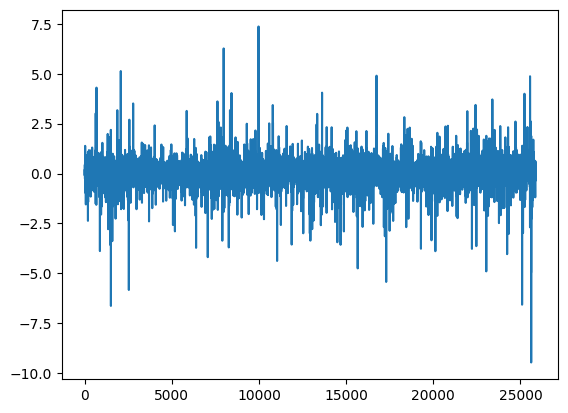

In [32]:
w = w.squeeze()
plt.plot(w)
print(np.sum(np.abs(w)<=1e-3))

### Lasso

In [33]:
from sklearn.linear_model import LogisticRegression

dl = LogisticRegression(penalty='l1',solver='saga', max_iter=1000, C=1, tol=1e-3)
dl.fit(X1,y1)
print(dl.score(X1,y1))
print(dl.score(X2,y2))

0.89836
0.8728


In [34]:
w = dl.coef_
idx = np.argsort(w).squeeze()
voc = tfidf.get_feature_names_out()
voc2=[voc[i] for i in idx]
print(voc2[:50]) #50 palavras mais negativas
print('\n','-'*100,'\n')
print(voc2[-50:]) #50 palavras mais positivas

['worst', 'waste', 'awful', 'poorly', 'disappointment', 'boring', 'fails', 'dull', 'worse', 'pointless', 'horrible', 'mess', 'poor', 'disappointing', 'unfunny', 'terrible', 'lacks', 'avoid', 'laughable', 'annoying', 'badly', 'unfortunately', 'ridiculous', 'forgettable', 'nothing', 'save', 'redeeming', 'lame', 'wooden', 'supposed', 'unless', 'instead', 'lousy', 'script', 'mediocre', 'mildly', 'pathetic', 'weak', 'dreadful', 'wonder', 'insult', 'basically', 'baldwin', 'stupid', 'obnoxious', 'tedious', 'uninteresting', 'predictable', 'incoherent', 'minutes']

 ---------------------------------------------------------------------------------------------------- 

['atmosphere', 'surprised', 'heart', 'captures', 'powerful', 'fascinating', 'world', 'also', 'simple', 'delightful', 'enjoy', 'outstanding', 'still', 'masterpiece', 'unique', 'hilarious', 'love', 'entertaining', 'liked', 'surprisingly', 'moving', 'well', 'beautiful', 'touching', 'funniest', 'finest', 'beautifully', 'incredible', 'e